In [89]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [90]:
df = pd.read_csv("storedata.csv")
df.head()

,Store ID,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,Store age,Clearance space,Competition number,Competition score,Performance
0,1437,9,18526,121,Yes,10,Retail Park,1288374,3,238,16,16,Good
1,1544,8,18569,121,Yes,11,Shopping Centre,1086225,4,384,15,19,Excellent
2,2039,-2,12288,105,No,12,Retail Park,1595638,11,219,13,18,Poor
3,2055,7,17092,117,No,14,High Street,1179395,5,261,15,12,Poor
4,2141,7,11307,103,No,18,Retail Park,1398558,7,200,19,13,Poor


In [91]:
df.drop(["Store ID", "Window", "Clearance space"], axis = 1, inplace = True)

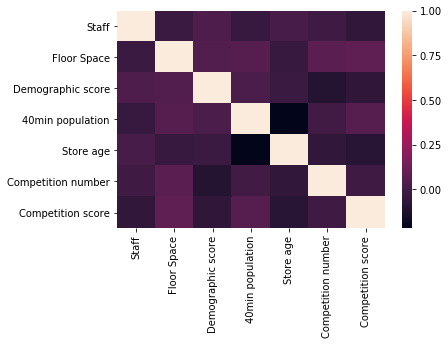

In [92]:
sns.heatmap(df.corr())

In [93]:
df.head()

,Staff,Floor Space,Car park,Demographic score,Location,40min population,Store age,Competition number,Competition score,Performance
0,9,18526,Yes,10,Retail Park,1288374,3,16,16,Good
1,8,18569,Yes,11,Shopping Centre,1086225,4,15,19,Excellent
2,-2,12288,No,12,Retail Park,1595638,11,13,18,Poor
3,7,17092,No,14,High Street,1179395,5,15,12,Poor
4,7,11307,No,18,Retail Park,1398558,7,19,13,Poor


In [94]:
df.drop(2 , axis = 0, inplace = True)

In [95]:
df = pd.get_dummies(df, prefix_sep="__", columns = ["Location"])

In [96]:
df.head()

,Staff,Floor Space,Car park,Demographic score,40min population,Store age,Competition number,Competition score,Performance,Location__High Street,Location__Retail Park,Location__Shopping Centre,Location__Village
0,9,18526,Yes,10,1288374,3,16,16,Good,0,1,0,0
1,8,18569,Yes,11,1086225,4,15,19,Excellent,0,0,1,0
3,7,17092,No,14,1179395,5,15,12,Poor,1,0,0,0
4,7,11307,No,18,1398558,7,19,13,Poor,0,1,0,0
5,7,17888,Yes,19,1614716,2,17,11,Good,0,1,0,0


In [97]:
df["Car park"].unique()

array(['Yes', 'No'], dtype=object)

In [98]:
df["Car park"] = df["Car park"].map({"Yes":1, "No":0})

In [99]:
df["Performance"].unique()

array(['Good', 'Excellent', 'Poor', 'Reasonable'], dtype=object)

In [100]:
df["Performance"] = df["Performance"].map({"Poor":0, "Reasonable":1, "Good":2, "Excellent":3})

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 133
Data columns (total 13 columns):
Staff                        133 non-null int64
Floor Space                  133 non-null int64
Car park                     133 non-null int64
Demographic score            133 non-null int64
40min population             133 non-null int64
Store age                    133 non-null int64
Competition number           133 non-null int64
Competition score            133 non-null int64
Performance                  133 non-null int64
Location__High Street        133 non-null uint8
Location__Retail Park        133 non-null uint8
Location__Shopping Centre    133 non-null uint8
Location__Village            133 non-null uint8
dtypes: int64(9), uint8(4)
memory usage: 10.9 KB


In [102]:
y = df["Performance"]
X = df.drop(["Performance"], axis = 1)
X.shape, y.shape

((133, 12), (133,))

In [103]:
X.head()

,Staff,Floor Space,Car park,Demographic score,40min population,Store age,Competition number,Competition score,Location__High Street,Location__Retail Park,Location__Shopping Centre,Location__Village
0,9,18526,1,10,1288374,3,16,16,0,1,0,0
1,8,18569,1,11,1086225,4,15,19,0,0,1,0
3,7,17092,0,14,1179395,5,15,12,1,0,0,0
4,7,11307,0,18,1398558,7,19,13,0,1,0,0
5,7,17888,1,19,1614716,2,17,11,0,1,0,0


In [104]:
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 17)

In [105]:
X_train.shape, X_valid.shape

((93, 12), (40, 12))

In [106]:
first_tree = DecisionTreeClassifier(random_state = 17)

In [107]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv = 5))

0.343921568627451

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
first_knn = KNeighborsClassifier()

In [110]:
np.mean(cross_val_score(first_knn, X_train, y_train, cv = 5))

0.2775163398692811

<h3>Searching optimal parameters for models with GridSearch </h3>

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
tree_params = {"max_depth": np.arange(1, 11), "max_features":[.5, .7, 1]}

In [113]:
tree_grid = GridSearchCV(first_tree, tree_params, cv = 5, n_jobs = -1)

In [114]:
%%time
tree_grid.fit(X_train, y_train)

Wall time: 2.76 s


M:\Anaconda3\envs\tfp\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1

In [115]:
tree_grid.best_score_, tree_grid.best_params_

(0.44086021505376344, {'max_depth': 2, 'max_features': 0.5})

In [116]:
knn_params = {"n_neighbors": range(5, 30, 1)}

In [117]:
knn_grid = GridSearchCV(first_knn, knn_params, cv = 6)

In [118]:
%%time
knn_grid.fit(X_train, y_train)

Wall time: 4.49 s


M:\Anaconda3\envs\tfp\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(5, 30)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [119]:
knn_grid.best_score_, knn_grid.best_params_

(0.3763440860215054, {'n_neighbors': 22})

In [121]:
tree_valid_pred = tree_grid.predict(X_valid)

In [122]:
from sklearn.metrics import accuracy_score

In [123]:
accuracy_score(y_valid, tree_valid_pred)

0.325

In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
confusion_matrix(y_valid, tree_valid_pred)

array([[5, 1, 0, 2],
       [3, 3, 0, 6],
       [5, 1, 0, 7],
       [1, 1, 0, 5]], dtype=int64)

In [126]:
from sklearn.tree import export_graphviz

In [127]:
best_tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
best_tree.score(X_valid, y_valid)

0.425

In [128]:
export_graphviz(best_tree, out_file = 'StoreData_tree.dot', feature_names = X.columns, filled=True)

In [141]:
!dir *.dot /s /p

 Volume in drive M is „ЁбЄ ќ¬
 Volume Serial Number is D44B-B0CC

 Directory of M:\Scripts\python\StoreData_Classification

12.06.2019  17:44             1я777 StoreData_tree.dot
               1 File(s)          1я777 bytes

     Total Files Listed:
               1 File(s)          1я777 bytes
               0 Dir(s)   5я471я522я816 bytes free


In [142]:
import pydot
(graph, ) = pydot.graph_from_dot_file("StoreData_tree.dot")
graph.write_png("StoreData_tree.png")

<img src = 'StoreData_tree.png'>